In [1]:
import pandas as pd
import numpy as np

from tqdm import tqdm

import gensim
from gensim.models import Word2Vec
from gensim.parsing.porter import PorterStemmer
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.8/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
SOURCES = ['Apache', 'Hyperledger', 'IntelDAOS', 'JFrog', 'Jira', 
           'JiraEcosystem', 'MariaDB', 'Mindville', 'Mojang', 'MongoDB', 
           'Qt', 'RedHat', 'Sakai', 'SecondLife', 'Sonatype', 'Spring']

link_text_dict = {}
countvect_dict = {}
tfidfvect_dict = {}

In [3]:
def load_data(source):
    #Loading Issues
    filename = '../data/processed/issues_'+source.lower()+'.csv'
    issue_df = pd.read_csv(filename, encoding="UTF-8", low_memory=False, sep=';')

    #Loading Links
    filename = '../data/processed/links_plus_'+source.lower()+'.csv'
    link_df = pd.read_csv(filename, encoding="UTF-8", low_memory=False, sep=';').drop_duplicates()
    
    return issue_df, link_df

In [4]:
def get_tf_idf_sim(x, y):
    x_tfidf = tfidf_vectorizer.transform(x)
    y_tfidf = tfidf_vectorizer.transform(y)
    cosim = cosine_similarity(x_tfidf, y_tfidf).flatten()
    return float(cosim)

In [8]:
for s in SOURCES:
    print(s.upper())
    issue_df, link_df = load_data(s)
    
    issue_df['title'].fillna(' ', inplace=True)
    issue_df['description'].fillna(' ', inplace=True)
    
    linked_issues = set(link_df['issue_id_1']).union(set(link_df['issue_id_2']))
    linked_issue_df = issue_df[issue_df['issue_id'].isin(linked_issues)]
    
    linked_issue_df['text'] = linked_issue_df['title']+ " " + linked_issue_df['description']
    
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df=0.05, ngram_range=(1,2))
    tfidf_wm = tfidf_vectorizer.fit_transform(list(linked_issue_df['text'].values))
    tfidf_tokens = tfidf_vectorizer.get_feature_names()
    df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),index = [linked_issue_df['issue_id']],columns = tfidf_tokens)
    tfidfvect_dict[s] = df_tfidfvect
    
    countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english', min_df=0.05)
    count_wm = countvectorizer.fit_transform(list(linked_issue_df['text'].values))
    count_tokens = countvectorizer.get_feature_names()
    df_countvect = pd.DataFrame(data = count_wm.toarray(),index = [linked_issue_df['issue_id']],columns = count_tokens)
    countvect_dict[s] = df_countvect
    
    issue_text_data = linked_issue_df[['text', 'issue_id']]
    
    link_text_df = link_df.merge(issue_text_data, left_on='issue_id_1', right_on='issue_id')
    link_text_df = link_text_df.merge(issue_text_data, left_on='issue_id_2', right_on='issue_id', suffixes=('_1', '_2'))
    
    cosims = []

    for i in tqdm(link_text_df.index):
        cosims.append(get_tf_idf_sim([link_text_df['text_1'].iloc[i]], [link_text_df['text_2'].iloc[i]]))

    link_text_df['cosim'] = cosims
                  
    link_text_dict[s] = link_text_df 

APACHE


<ipython-input-8-e56f2ed5708a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linked_issue_df['text'] = linked_issue_df['title']+ " " + linked_issue_df['description']
100%|██████████| 267400/267400 [48:49<00:00, 91.28it/s] 


HYPERLEDGER


100%|██████████| 18342/18342 [00:42<00:00, 432.31it/s]


INTELDAOS


100%|██████████| 2798/2798 [00:06<00:00, 433.01it/s]


JFROG


100%|██████████| 3522/3522 [00:07<00:00, 475.52it/s]


JIRA


100%|██████████| 105075/105075 [07:48<00:00, 224.19it/s]


JIRAECOSYSTEM


100%|██████████| 11967/11967 [00:25<00:00, 461.29it/s]


MARIADB


100%|██████████| 16449/16449 [00:46<00:00, 353.60it/s]


MINDVILLE


100%|██████████| 55/55 [00:00<00:00, 527.38it/s]


MOJANG


100%|██████████| 258637/258637 [43:12<00:00, 99.77it/s] 


MONGODB


100%|██████████| 68092/68092 [03:47<00:00, 299.66it/s]


QT


100%|██████████| 43447/43447 [02:01<00:00, 356.61it/s]


REDHAT


100%|██████████| 125367/125367 [10:07<00:00, 206.43it/s]


SAKAI


100%|██████████| 22278/22278 [00:57<00:00, 389.80it/s]


SECONDLIFE


100%|██████████| 736/736 [00:01<00:00, 529.93it/s]


SONATYPE


100%|██████████| 4870/4870 [00:10<00:00, 451.17it/s]


SPRING


100%|██████████| 16068/16068 [00:37<00:00, 425.78it/s]


<ipython-input-10-55cfbf76f236>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,10))


<Figure size 576x720 with 0 Axes>

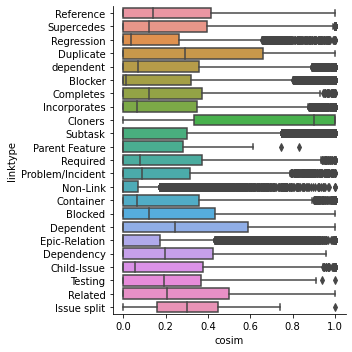

<Figure size 576x720 with 0 Axes>

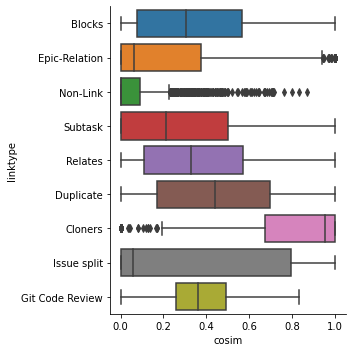

<Figure size 576x720 with 0 Axes>

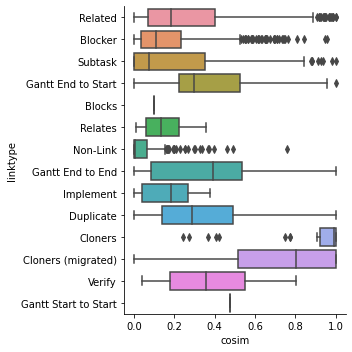

<Figure size 576x720 with 0 Axes>

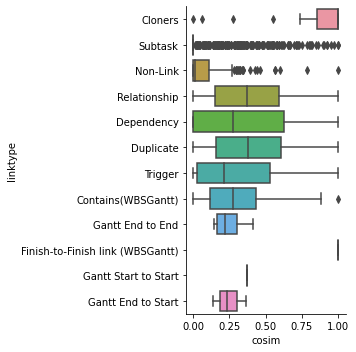

<Figure size 576x720 with 0 Axes>

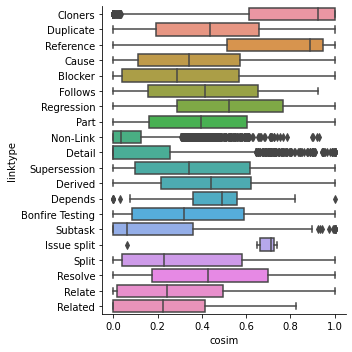

<Figure size 576x720 with 0 Axes>

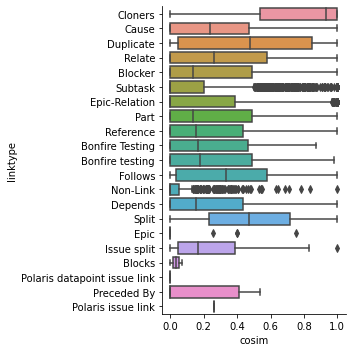

<Figure size 576x720 with 0 Axes>

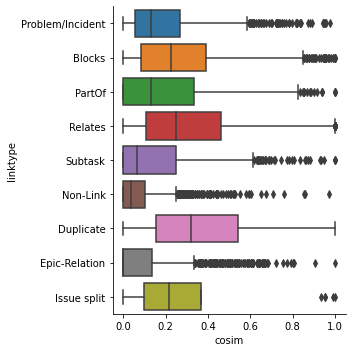

<Figure size 576x720 with 0 Axes>

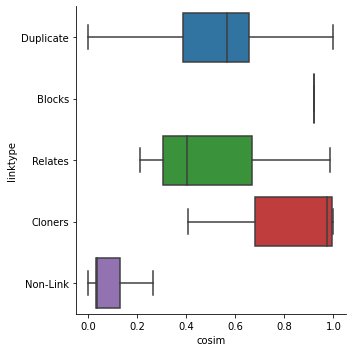

<Figure size 576x720 with 0 Axes>

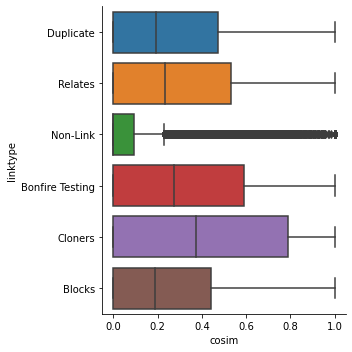

<Figure size 576x720 with 0 Axes>

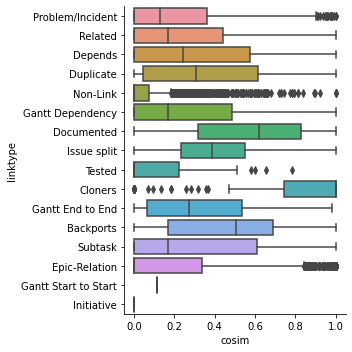

<Figure size 576x720 with 0 Axes>

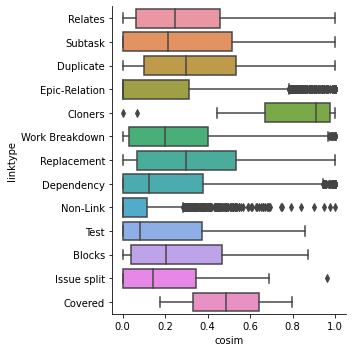

<Figure size 576x720 with 0 Axes>

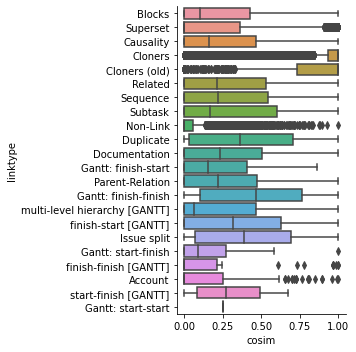

<Figure size 576x720 with 0 Axes>

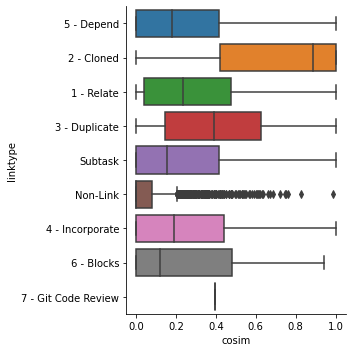

<Figure size 576x720 with 0 Axes>

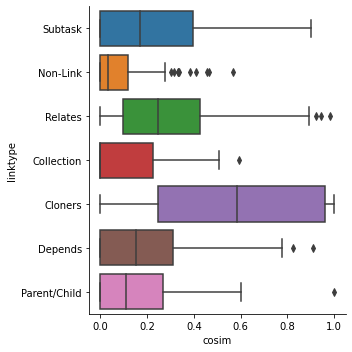

<Figure size 576x720 with 0 Axes>

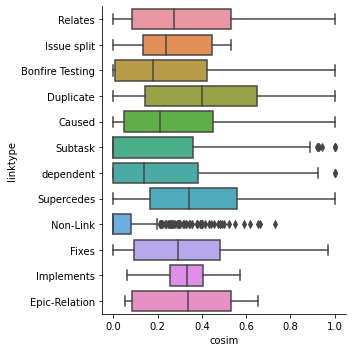

<Figure size 576x720 with 0 Axes>

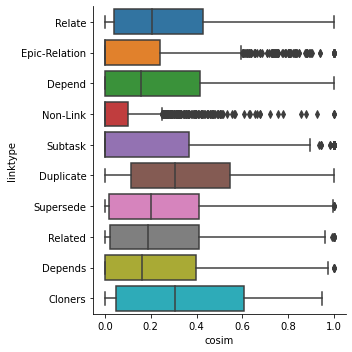

In [10]:
for s in SOURCES:
    plt.figure(figsize=(8,10))

    sns.catplot(x="cosim", y="linktype", data=link_text_dict[s], kind="box")

In [11]:
type_dict={'Backports': 'Backport', 
           
    'Blocked': 'Block',
    'Blocker': 'Block',
    'Blocks': 'Block',
           
    'Bonfire Testing': 'Bonfire Testing', 
    'Bonfire testing': 'Bonfire Testing', 
    'Git Code Review': 'Bonfire Testing', 
    'Testing': 'Bonfire Testing',
           
    'Causality': 'Cause', 
    'Cause': 'Cause',
    'Caused': 'Cause', 
    'Problem/Incident': 'Cause',
           
    'Child-Issue': 'Parent-Child', 
    'Parent Feature': 'Parent-Child',
    'Parent/Child': 'Parent-Child',
    'multi-level hierarchy [GANTT]': 'Parent-Child',
    'Parent-Relation': 'Parent-Child',
           
    'Cloners': 'Clone', 
    'Cloners (old)': 'Clone', 
           
    'Collection': 'Incorporate', 
    'Container': 'Incorporate',
    'Contains(WBSGantt)': 'Incorporate', 
    'Incorporate': 'Incorporate', 
    'Incorporates': 'Incorporate', 
    'Part': 'Incorporate',
    'PartOf': 'Incorporate',
    'Superset': 'Incorporate', 
           
    'Completes': 'Fix', 
    'Fixes': 'Fix',
    'Resolve': 'Fix',
           
    'Depend': 'Depend', 
    'Dependency': 'Depend', 
    'Dependent': 'Depend', 
    'Depends': 'Depend', 
    'Gantt Dependency': 'Depend',
    'dependent': 'Depend',
           
    'Derived': 'Derive',
           
    'Detail': 'Detail', 
           
    'Documentation': 'Documented',
    'Documented': 'Documented',
    
    'Duplicate': 'Duplicate',
           
    'Epic': 'Epic', 
    'Epic-Relation': 'Epic',
    
    'Finish-to-Finish link (WBSGantt)': 'finish-finish', 
    'Gantt End to End': 'finish-finish', 
    'Gantt: finish-finish': 'finish-finish',
    'finish-finish [GANTT]': 'finish-finish', 
    
    'Gantt End to Start': 'finish-start', 
    'Gantt: finish-start': 'finish-start',
    'finish-start [GANTT]': 'finish-start',

    'Gantt Start to Start': 'start-start', 
    
    'Gantt: start-finish': 'start-finish', 
    
    'Follows': 'Follow', 
    'Sequence': 'Follow', 
    
    'Implement': 'Implement', 
    'Implements': 'Implements', 
    
    'Issue split': 'Split',
    'Split': 'Split',
    'Work Breakdown': 'Split',
    
    'Preceded By': 'Precede', 
    
    'Reference': 'Relate',
    'Relate': 'Relate',
    'Related': 'Relate', 
    'Relates': 'Relate',
    'Relationship': 'Relate',
    
    'Regression': 'Breaks', 
    
    'Replacement': 'Replace',
    
    'Required': 'Require', 
    
    'Supercedes': 'Supercede',
    'Supersede': 'Supercede',
    'Supersession': 'Supercede', 
    
    'Subtask': 'Subtask',
    
    'Test': 'Test', 
    'Tested': 'Test',
    
    'Trigger': 'Trigger', 
    
    'Non-Link': 'Non-Link'}

cat_dict = {'Block': 'Causal',
    'Bonfire Testing': 'Workflow',
    'Breaks': 'Causal',
    'Cause': 'Causal',
    'Clone': 'General',
    'Depend': 'Causal',
    'Detail': 'Workflow',
    'Documented': 'Workflow',
    'Duplicate': 'General',
    'Epic': 'Epic',
    'Fix': 'Workflow',
    'Follow': 'Causal',
    'Incorporate': 'Split',
    'Parent-Child': 'Split',
    'Relate': 'General',
    'Replace': 'General',
    'Require': 'Causal',
    'Split': 'Split',
    'Subtask': 'Split',
    'Supercede': 'Causal',
    'Trigger': 'Workflow',
    'finish-start': 'Causal',
    'Non-Link': 'Non-Link'
           }

In [12]:
for s in SOURCES:
    link_text_dict[s]['mappedtype'] = link_text_dict[s]['linktype'].map(type_dict)
    link_text_dict[s]['cattype'] = link_text_dict[s]['mappedtype'].map(cat_dict)

In [22]:
relevant_types = ['Relate', 'Duplicate', 'Subtask', 'Depend', 'Clone', 'Incorporate', 'Epic', 'Block', 'Cause', 'Non-Link']

median = []
mean = []
std = []

for s in SOURCES:
    temp_df = link_text_dict[s]
    
    temp_median = [s]
    temp_mean = [s]
    temp_std = [s]
    
    for i in relevant_types:
        if i in set(temp_df['mappedtype'].unique()):
            temp_link_df = temp_df[temp_df['mappedtype']==i]
            temp_median.append(temp_link_df['cosim'].median())
            temp_mean.append(temp_link_df['cosim'].mean())
            temp_std.append(temp_link_df['cosim'].std())
        else:
            temp_median.append("not in repo")
            temp_mean.append("not in repo")
            temp_std.append("not in repo")
            
    median.append(temp_median)
    mean.append(temp_mean)
    std.append(temp_std)


In [23]:
cols = ['Repo', 'Relate', 'Duplicate', 'Subtask', 'Depend', 'Clone', 'Incorporate', 'Epic', 'Block', 'Cause', 'Non-Link']
median_df = pd.DataFrame(median, columns = cols)
mean_df = pd.DataFrame(mean, columns = cols)
std_df = pd.DataFrame(std, columns = cols)

In [24]:
def special_round(x, i):
    try:
        if i == 0:
            y = int(round(x, 0))
        else:
            y = round(x, i)
    except: 
        y = None
    return y

In [25]:
bla = median_df.set_index('Repo')
bla.round(decimals = 2)

# print(bla.to_latex())
for i in bla.columns:
    bla[i] = bla[i].apply(lambda x: special_round(x,2))
    
print(bla.to_latex())

\begin{tabular}{lrrrrrrrrrr}
\toprule
{} &  Relate &  Duplicate &  Subtask &  Depend &  Clone &  Incorporate &  Epic &  Block &  Cause &  Non-Link \\
Repo          &         &            &          &         &        &              &       &        &        &           \\
\midrule
Apache        &    0.14 &       0.29 &     0.00 &    0.08 &   0.90 &         0.07 &  0.00 &   0.03 &   0.09 &      0.00 \\
Hyperledger   &    0.33 &       0.44 &     0.21 &     NaN &   0.95 &          NaN &  0.06 &   0.31 &    NaN &      0.00 \\
IntelDAOS     &    0.18 &       0.29 &     0.07 &     NaN &   0.99 &          NaN &   NaN &   0.11 &    NaN &      0.00 \\
JFrog         &    0.37 &       0.38 &     0.00 &    0.28 &   1.00 &         0.27 &   NaN &    NaN &    NaN &      0.02 \\
Jira          &    0.89 &       0.44 &     0.06 &    0.49 &   0.92 &         0.40 &   NaN &   0.29 &   0.34 &      0.03 \\
JiraEcosystem &    0.25 &       0.48 &     0.00 &    0.15 &   0.94 &         0.13 &  0.00 &   0.13 &   

In [26]:
bla.mean(axis = 0, skipna = True)

Relate         0.292667
Duplicate      0.361429
Subtask        0.090714
Depend         0.201111
Clone          0.833077
Incorporate    0.142857
Epic           0.050000
Block          0.250000
Cause          0.185714
Non-Link       0.010000
dtype: float64

In [7]:
std_df

NameError: name 'std_df' is not defined

In [27]:
common_link_text_dict = {}
for s in SOURCES:
    linktypes = (link_text_dict[s].mappedtype.value_counts()>=len(link_text_dict[s])*0.01).rename_axis('mappedtype').reset_index(name='valid')
    valid_types = set(linktypes[linktypes['valid']==True]['mappedtype'])

    all_data = link_text_dict[s][(link_text_dict[s]["mappedtype"].isin(valid_types))]
    
    common_link_text_dict[s] = all_data

In [28]:
link_issue_df_dict = {}

for s in SOURCES:
    issue_df, link_df = load_data(s)
    
    issue_df['title'].fillna(' ', inplace=True)
    issue_df['description'].fillna(' ', inplace=True)
    
    linked_issues = set(link_df['issue_id_1']).union(set(link_df['issue_id_2']))
    linked_issue_df = issue_df[issue_df['issue_id'].isin(linked_issues)]
    
    titles = linked_issue_df['title']
    title_lengths = (titles.str.count(' ')+1).fillna(0).astype(np.int)
    titles = linked_issue_df['description']
    desc_lengths = (titles.str.count(' ')+1).fillna(0).astype(np.int)
    
    linked_issue_df['title_len'] = title_lengths
    linked_issue_df['desc_len'] = desc_lengths
    
    linked_issue_df['title_len_char'] = linked_issue_df['title'].apply(lambda x: len(str(x)))
    linked_issue_df['desc_len_char'] = linked_issue_df['description'].apply(lambda x: len(str(x)))
    
    issue_text_data = linked_issue_df[['title_len', 'desc_len', 'title_len_char', 'desc_len_char', 'issue_id']]
    
    link_issue_df_dict[s] = linked_issue_df
    
    link_text_df = common_link_text_dict[s]
    
    link_text_df = link_df.merge(issue_text_data, left_on='issue_id_1', right_on='issue_id')
    link_text_df = link_text_df.merge(issue_text_data, left_on='issue_id_2', right_on='issue_id', suffixes=('_1', '_2'))
    
    link_text_df['diff_char_title'] =  link_text_df['title_len_char_1'] - link_text_df['title_len_char_2']
    link_text_df['diff_title'] =  link_text_df['title_len_1'] - link_text_df['title_len_2']
    link_text_df['diff_char_desc'] =  link_text_df['desc_len_char_1'] - link_text_df['desc_len_char_2']
    link_text_df['diff_desc'] =  link_text_df['desc_len_1'] - link_text_df['desc_len_2']
    
    common_link_text_dict[s] = link_text_df

<ipython-input-28-9370f82300be>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linked_issue_df['title_len'] = title_lengths
<ipython-input-28-9370f82300be>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linked_issue_df['desc_len'] = desc_lengths
<ipython-input-28-9370f82300be>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [29]:
for s in SOURCES:
    common_link_text_dict[s]['mappedtype'] = common_link_text_dict[s]['linktype'].map(type_dict)
    common_link_text_dict[s]['cattype'] = common_link_text_dict[s]['mappedtype'].map(cat_dict)

In [30]:
for s in SOURCES:
    temp_df = common_link_text_dict[s]
    temp_df['diff_text'] = temp_df['diff_title'] + temp_df['diff_desc']
    temp_df['diff_text'] = temp_df['diff_text'].apply(lambda x: abs(x))
    temp_df['diff_char_title'] = temp_df['diff_char_title'].apply(lambda x: abs(x))
    temp_df['diff_title'] = temp_df['diff_title'].apply(lambda x: abs(x))
    temp_df['diff_char_desc'] = temp_df['diff_char_desc'].apply(lambda x: abs(x))
    temp_df['diff_desc'] = temp_df['diff_desc'].apply(lambda x: abs(x))
    
    common_link_text_dict[s] = temp_df

In [31]:
for s in SOURCES:
    
    temp_df = common_link_text_dict[s]
    
    temp_df['title_len'] = temp_df['title_len_1']+temp_df['title_len_2']
    temp_df['desc_len'] = temp_df['desc_len_1']+temp_df['desc_len_2']
    
    temp_df['title_len_char'] = temp_df['title_len_char_1']+temp_df['title_len_char_2']
    temp_df['desc_len_char'] = temp_df['desc_len_char_1']+temp_df['desc_len_char_2']
    
    temp_df['text_len'] = temp_df['title_len']+temp_df['desc_len']
    
    
    
    common_link_text_dict[s] = temp_df

In [32]:
relevant_types = ['Relate', 'Duplicate', 'Subtask', 'Depend', 'Clone', 'Incorporate', 'Epic', 'Block', 'Cause', 'Non-Link']

median = []
mean = []
std = []

for s in SOURCES:
    temp_df = common_link_text_dict[s]
    
    temp_median = [s]
    temp_mean = [s]
    temp_std = [s]
    
    for i in relevant_types:
        if i in set(temp_df['mappedtype'].unique()):
            temp_link_df = temp_df[temp_df['mappedtype']==i]
            temp_median.append(temp_link_df['text_len'].median())
            temp_mean.append(temp_link_df['text_len'].mean())
            temp_std.append(temp_link_df['text_len'].std())
        else:
            temp_median.append("not in repo")
            temp_mean.append("not in repo")
            temp_std.append("not in repo")
            
    median.append(temp_median)
    mean.append(temp_mean)
    std.append(temp_std)


In [33]:
cols = ['Repo', 'Relate', 'Duplicate', 'Subtask', 'Depend', 'Clone', 'Incorporate', 'Epic', 'Block', 'Cause', 'Non-Link']

median_df = pd.DataFrame(median, columns = cols)
mean_df = pd.DataFrame(mean, columns = cols)
std_df = pd.DataFrame(std, columns = cols)

In [34]:
bla = median_df.set_index('Repo')

bla
# print(bla.to_latex())
for i in bla.columns:
    bla[i] = bla[i].apply(lambda x: special_round(x, 0))
    
print(bla.to_latex())

\begin{tabular}{lrrrrrrrrrr}
\toprule
{} &  Relate &  Duplicate &  Subtask &  Depend &  Clone &  Incorporate &   Epic &  Block &  Cause &  Non-Link \\
Repo          &         &            &          &         &        &              &        &        &        &           \\
\midrule
Apache        &   157.0 &      159.0 &     87.0 &   114.0 &   98.0 &        120.0 &   93.0 &  109.0 &  172.0 &       133 \\
Hyperledger   &   176.0 &      159.0 &     79.0 &     NaN &   92.0 &          NaN &   96.0 &  131.0 &    NaN &       105 \\
IntelDAOS     &   268.0 &      398.0 &     90.0 &     NaN &  123.0 &          NaN &    NaN &  297.0 &    NaN &       142 \\
JFrog         &   152.0 &      172.0 &      9.0 &    70.0 &  260.0 &        195.0 &    NaN &    NaN &    NaN &       131 \\
Jira          &   192.0 &      182.0 &     76.0 &   158.0 &  180.0 &        183.0 &    NaN &  161.0 &  244.0 &       168 \\
JiraEcosystem &   119.0 &      104.0 &     36.0 &   105.0 &  108.0 &         93.0 &   51.0 &   8

In [37]:
bla.mean(axis = 0, skipna = True)

Relate         186.600000
Duplicate      193.928571
Subtask         68.571429
Depend         109.222222
Clone          141.153846
Incorporate    139.000000
Epic            79.625000
Block          167.300000
Cause          215.428571
Non-Link       140.125000
dtype: float64

In [38]:
relevant_types = ['Relate', 'Duplicate', 'Subtask', 'Depend', 'Clone', 'Incorporate', 'Epic', 'Block', 'Cause', 'Non-Link']

median = []
mean = []
std = []

for s in SOURCES:
    temp_df = common_link_text_dict[s]
    
    temp_median = [s]
    temp_mean = [s]
    temp_std = [s]
    
    for i in relevant_types:
        if i in set(temp_df['mappedtype'].unique()):
            temp_link_df = temp_df[temp_df['mappedtype']==i]
            temp_median.append(temp_link_df['diff_text'].median())
            temp_mean.append(temp_link_df['diff_text'].mean())
            temp_std.append(temp_link_df['diff_text'].std())
        else:
            temp_median.append("not in repo")
            temp_mean.append("not in repo")
            temp_std.append("not in repo")
            
    median.append(temp_median)
    mean.append(temp_mean)
    std.append(temp_std)


In [39]:
cols = ['Repo', 'Relate', 'Duplicate', 'Subtask', 'Depend', 'Clone', 'Incorporate', 'Epic', 'Block', 'Cause', 'Non-Link']

median_df = pd.DataFrame(median, columns = cols)
mean_df = pd.DataFrame(mean, columns = cols)
std_df = pd.DataFrame(std, columns = cols)

In [40]:
bla = median_df.set_index('Repo')

bla
# print(bla.to_latex())
for i in bla.columns:
    bla[i] = bla[i].apply(lambda x: special_round(x, 0))
    
print(bla.to_latex())

\begin{tabular}{lrrrrrrrrrr}
\toprule
{} &  Relate &  Duplicate &  Subtask &  Depend &  Clone &  Incorporate &  Epic &  Block &  Cause &  Non-Link \\
Repo          &         &            &          &         &        &              &       &        &        &           \\
\midrule
Apache        &    50.0 &       43.0 &     34.0 &    37.0 &    3.0 &         41.0 &  44.0 &   36.0 &   62.0 &        52 \\
Hyperledger   &    58.0 &       50.0 &     35.0 &     NaN &    2.0 &          NaN &  48.0 &   46.0 &    NaN &        46 \\
IntelDAOS     &    91.0 &      146.0 &     30.0 &     NaN &    2.0 &          NaN &   NaN &  147.0 &    NaN &        59 \\
JFrog         &    44.0 &       49.0 &      5.0 &    18.0 &    2.0 &         61.0 &   NaN &    NaN &    NaN &        60 \\
Jira          &     0.0 &       43.0 &     33.0 &    39.0 &    8.0 &         49.0 &   NaN &   43.0 &   68.0 &        54 \\
JiraEcosystem &    32.0 &       24.0 &     12.0 &    36.0 &    4.0 &         31.0 &  28.0 &   24.0 &   

In [41]:
bla.mean(axis = 0, skipna = True)

Relate         52.733333
Duplicate      56.142857
Subtask        26.500000
Depend         35.444444
Clone           9.000000
Incorporate    56.285714
Epic           38.375000
Block          65.800000
Cause          75.142857
Non-Link       53.937500
dtype: float64

In [53]:
count_df = pd.DataFrame()

for s in SOURCES:
    print(s.upper())
    countvects_df = countvect_dict[s]
    link_text_df = common_link_text_dict[s]
    link_text_df = link_text_df.T.drop_duplicates().T
    
    countvects_df = countvects_df.reset_index()

    for i in link_text_df.mappedtype.unique():
        temp_df = link_text_df[link_text_df['mappedtype']==i]
        temp_issues = set(temp_df['issue_id_1']).union(set(temp_df['issue_id_2']))
        
        temp_countvects_df = countvects_df[countvects_df['issue_id'].isin(temp_issues)]
        
        counts = temp_countvects_df.set_index('issue_id').sum().sort_values(ascending=False)[:20]
        
        bla = counts.reset_index().drop(0)
        bla.loc['SOURCE']=s
        bla.loc['mappedtype']=i
#         print(bla.T)
        count_df = pd.concat([count_df, bla.T])
    
    
#         print(temp_countvects_df.sum().sort_values(ascending=False))

APACHE
HYPERLEDGER
INTELDAOS
JFROG
JIRA
JIRAECOSYSTEM
MARIADB
MINDVILLE
MOJANG
MONGODB
QT
REDHAT
SAKAI
SECONDLIFE
SONATYPE
SPRING


In [55]:
count_df.set_index(['SOURCE', 'mappedtype'], inplace = True)

In [62]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

<ipython-input-62-1390d13c0cdd>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [222]:
count_df.loc['Apache']

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
mappedtype,,,,,,,,,,,,,,,,,,,
Relate,org,apache,hadoop,code,run,com,error,10,server,test,file,thread,class,lang,http,method,client,new,data
Relate,305505,249685,70016,66091,46717,41846,41825,40686,40494,39346,36743,33678,31560,31310,28114,27300,26032,25437,25414
Supercede,org,apache,code,hadoop,error,com,build,run,file,use,thread,tests,https,test,log,files,version,data,server
Supercede,10589,8727,3217,2222,2105,2005,1926,1795,1701,1558,1544,1480,1407,1403,1396,1394,1391,1349,1346
Breaks,org,apache,hadoop,code,server,error,run,test,class,lang,file,com,thread,10,client,method,main,data,string
Breaks,25318,22108,11795,5596,4189,3963,3913,3688,3597,3101,2966,2895,2730,2394,2369,2170,2104,2060,1969
Duplicate,org,apache,file,class,method,com,run,code,hadoop,error,10,lang,test,thread,server,api,data,http,main
Duplicate,324945,166316,146780,146709,124780,52260,44223,34820,34171,30179,29255,29051,25641,25172,24468,21194,20060,18446,16337
Depend,org,apache,hadoop,code,file,test,thread,http,use,10,add,support,new,com,error,run,server,version,data


In [10]:
def get_w2v_sim(x, y):
    cosim = cosine_similarity(x, y).flatten()
    return float(cosim)

In [12]:
link_text_w2v_dict = {}

for s in ['JFrog']:
    print(s.upper())
    issue_df, link_df = load_data(s)
    
    text_data = np.load('experiments/w2v/text_data_'+s.lower()+'.npy')
    issue_df['text_emb']=list(text_data)
    
    linked_issues = set(link_df['issue_id_1']).union(set(link_df['issue_id_2']))
    linked_issue_df = issue_df[issue_df['issue_id'].isin(linked_issues)]
    
    linked_issue_df['text'] = linked_issue_df['title']+ " " + linked_issue_df['description']
       
    issue_text_data = linked_issue_df[['text', 'text_emb', 'issue_id']]
    
    link_text_df = link_df.merge(issue_text_data, left_on='issue_id_1', right_on='issue_id')
    link_text_df = link_text_df.merge(issue_text_data, left_on='issue_id_2', right_on='issue_id', suffixes=('_1', '_2'))
    
    cosims_w2v = []

    for i in tqdm(link_text_df.index):
        cosims_w2v.append(get_w2v_sim([link_text_df['text_emb_1'].iloc[i]], [link_text_df['text_emb_2'].iloc[i]]))

    link_text_df['cosim_w2v'] = cosims_w2v
                  
    link_text_w2v_dict[s] = link_text_df 

JFROG


<ipython-input-12-353dba77a508>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linked_issue_df['text'] = linked_issue_df['title']+ " " + linked_issue_df['description']
100%|██████████| 3522/3522 [00:03<00:00, 1169.70it/s]


In [21]:
print("Creating embeddings.")
embeddings_index = {}
with open('../../../LYNX/lynx/jupyter/class_clara/glove.42B/glove.42B.300d.txt') as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, 'f', sep=' ')
        embeddings_index[word] = coefs

print('Found %s word vectors.' % len(embeddings_index))

unknown_words =[]

Creating embeddings.
Found 1917494 word vectors.


In [6]:
import stanza
from tensorflow.keras.preprocessing.text import Tokenizer

# stanza.download(lang ='en')

nlp = stanza.Pipeline(lang='en', processors='tokenize')

2022-02-04 10:41:53 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |

2022-02-04 10:41:53 INFO: Use device: gpu
2022-02-04 10:41:53 INFO: Loading: tokenize
2022-02-04 10:41:56 INFO: Done loading processors!


In [17]:

from tensorflow.keras.preprocessing.sequence import pad_sequences

In [23]:
for s in ['JFrog']:
    text_1 = []
    text_2 = []

    all_data = link_text_w2v_dict[s]
    
    for i in tqdm(all_data.index):
        if not pd.isna(all_data['text_1'][i]):
            temp_doc = nlp(all_data['text_1'][i])
        #     print(temp_doc)
            temp_text_tokens = []
            for sentence in temp_doc.sentences:
                for token in sentence.tokens:
                    temp_text_tokens.append(token.text)
            text_1.append(temp_text_tokens)
        else:
            text_1.append([' '])
            print(i)
        if not pd.isna(all_data['text_2'][i]):
            temp_doc = nlp(all_data['text_2'][i])
        #     print(temp_doc)
            temp_text_tokens = []
            for sentence in temp_doc.sentences:
                for token in sentence.tokens:
                    temp_text_tokens.append(token.text)
            text_2.append(temp_text_tokens)
        else:
            text_2.append([' '])
            print(i)
            
    all_data['text_1_stanza']=list(text_1)
    all_data['text_2_stanza']=list(text_2)
    
    t1_texts = all_data['text_1_stanza'].tolist()
    t2_texts = all_data['text_2_stanza'].tolist()

    t_texts = t1_texts + t2_texts

    tokenizer = Tokenizer(num_words=20000)
    tokenizer.fit_on_texts(t_texts)
    t_sequences = tokenizer.texts_to_sequences(t_texts)

    word_index_t = tokenizer.word_index
    print('Found %s unique tokens.' % len(word_index_t))

    t_text_data = pad_sequences(t_sequences, maxlen=300)

    num_words_t = min(20000, len(word_index_t) + 1)
    embedding_matrix_T = np.zeros((num_words_t, 300))
    for word, i in word_index_t.items():
        if i >= 20000:
            continue
        try:
            embedding_vector = embeddings_index[word]
        except KeyError:
            try:
                embedding_vector = embeddings_index[word.lower()]
            except KeyError:
                try:
                    embedding_vector = embeddings_index[word.title()]
                except KeyError:
                    unknown_words.append(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            embedding_matrix_T[i] = embedding_vector
    t1_text_data = t_text_data[:len(all_data),:]
    t2_text_data = t_text_data[len(all_data):,:]
    
    all_data['text_emb_glove_1'] = t1_text_data
    all_data['text_emb_glove_2'] = t2_text_data
    
    cosims_glove = []
    
    for i in tqdm(all_data.index):
        cosims_glove.append(get_w2v_sim([all_data['text_emb_glove_1'].iloc[i]], [all_data['text_emb_glove_2'].iloc[i]]))

    all_data['cosim_glove'] = cosims_glove
                  
    link_text_w2v_dict[s] = all_data 

 21%|██        | 737/3522 [00:07<00:26, 106.74it/s]

718


 24%|██▎       | 835/3522 [00:08<00:31, 84.53it/s] 

835


 24%|██▍       | 844/3522 [00:09<00:57, 46.34it/s]

837
842
842
843
844
844


 24%|██▍       | 859/3522 [00:09<00:51, 51.87it/s]

851
853
854
854
855
856
856
857
857
858
859
859


 25%|██▍       | 877/3522 [00:09<00:45, 58.73it/s]

869
870
871
872
873
874
874
875
875
876


 25%|██▌       | 885/3522 [00:09<00:55, 47.32it/s]

883
884
885
886


 26%|██▌       | 903/3522 [00:10<01:11, 36.45it/s]

896
897
898
899
900
901
902
903
904
905


 26%|██▌       | 924/3522 [00:11<01:39, 26.12it/s]

910
911
912
913
913
914
915
915
916
917
917
918
918
919
920
920
921


 35%|███▍      | 1220/3522 [00:45<05:07,  7.48it/s]

1221


 38%|███▊      | 1346/3522 [00:58<03:21, 10.78it/s]

1344


 39%|███▉      | 1371/3522 [01:00<02:56, 12.21it/s]

1367
1367


 39%|███▉      | 1378/3522 [01:01<02:53, 12.32it/s]

1373
1374
1375
1375
1376
1376
1377
1377
1378
1378
1379
1380
1381
1382


 40%|███▉      | 1406/3522 [01:03<02:27, 14.37it/s]

1401


 43%|████▎     | 1497/3522 [01:11<01:17, 25.97it/s]

1494
1496


 44%|████▍     | 1550/3522 [01:15<01:59, 16.47it/s]

1549


 45%|████▌     | 1585/3522 [01:20<01:32, 20.85it/s]

1582


 45%|████▌     | 1600/3522 [01:21<01:46, 18.02it/s]

1590
1591
1592
1593
1594
1596
1598


 46%|████▌     | 1618/3522 [01:21<01:09, 27.57it/s]

1611


 48%|████▊     | 1685/3522 [01:26<02:11, 13.99it/s]

1682


 48%|████▊     | 1697/3522 [01:28<04:50,  6.28it/s]

1697


 49%|████▊     | 1712/3522 [01:30<02:36, 11.60it/s]

1705


 49%|████▉     | 1737/3522 [01:31<01:34, 18.87it/s]

1736


 50%|█████     | 1776/3522 [01:35<04:57,  5.86it/s]

1777


 51%|█████     | 1795/3522 [01:37<02:12, 13.08it/s]

1791


 52%|█████▏    | 1836/3522 [01:40<01:59, 14.07it/s]

1831
1834


 53%|█████▎    | 1881/3522 [01:43<01:48, 15.09it/s]

1879


 54%|█████▍    | 1906/3522 [01:44<01:14, 21.70it/s]

1904


 54%|█████▍    | 1917/3522 [01:45<01:50, 14.51it/s]

1913


 55%|█████▌    | 1947/3522 [01:46<00:44, 35.53it/s]

1937
1938
1939
1941
1942
1944
1945
1946


 56%|█████▌    | 1969/3522 [01:53<04:22,  5.91it/s]

1971


 56%|█████▌    | 1977/3522 [01:54<03:43,  6.92it/s]

1974


 58%|█████▊    | 2035/3522 [01:57<01:37, 15.18it/s]

2033


 58%|█████▊    | 2054/3522 [01:58<01:05, 22.55it/s]

2048


 59%|█████▉    | 2081/3522 [01:59<00:46, 30.94it/s]

2073
2074
2075


 60%|█████▉    | 2097/3522 [02:00<01:00, 23.48it/s]

2090
2091
2091
2095
2095


 60%|██████    | 2117/3522 [02:00<00:49, 28.15it/s]

2113
2114


 60%|██████    | 2130/3522 [02:01<00:43, 32.30it/s]

2125


 61%|██████    | 2139/3522 [02:01<00:39, 34.96it/s]

2134


 61%|██████▏   | 2158/3522 [02:02<00:36, 37.73it/s]

2148
2151
2154


 62%|██████▏   | 2173/3522 [02:02<00:36, 37.25it/s]

2167
2169
2174
2175


 62%|██████▏   | 2178/3522 [02:02<00:33, 40.22it/s]

2176
2178


 62%|██████▏   | 2187/3522 [02:03<00:48, 27.71it/s]

2187
2187
2188


 62%|██████▏   | 2194/3522 [02:04<02:40,  8.26it/s]

2193
2194
2195


 63%|██████▎   | 2202/3522 [02:05<02:00, 11.00it/s]

2200
2200


 63%|██████▎   | 2213/3522 [02:05<01:10, 18.64it/s]

2205
2209
2210
2213


 63%|██████▎   | 2225/3522 [02:05<00:52, 24.49it/s]

2224


 63%|██████▎   | 2234/3522 [02:06<00:53, 23.93it/s]

2230


 64%|██████▎   | 2238/3522 [02:06<00:54, 23.37it/s]

2236
2239
2240


 64%|██████▍   | 2251/3522 [02:11<05:50,  3.63it/s]

2249


 64%|██████▍   | 2254/3522 [02:12<05:00,  4.22it/s]

2252
2252
2255
2255


 64%|██████▍   | 2267/3522 [02:13<02:45,  7.60it/s]

2262
2263
2265
2265
2266


 66%|██████▌   | 2309/3522 [02:16<00:37, 32.71it/s]

2298
2302
2303
2304
2307


 66%|██████▌   | 2318/3522 [02:17<00:37, 32.50it/s]

2319


 66%|██████▌   | 2326/3522 [02:17<01:00, 19.75it/s]

2325
2326
2327
2328
2329
2330


 66%|██████▋   | 2339/3522 [02:20<04:57,  3.98it/s]

2340
2342


 67%|██████▋   | 2364/3522 [02:21<01:28, 13.12it/s]

2364
2365
2366
2366
2367


 67%|██████▋   | 2368/3522 [02:22<01:48, 10.62it/s]

2368
2369


 67%|██████▋   | 2372/3522 [02:22<01:59,  9.62it/s]

2371


 68%|██████▊   | 2378/3522 [02:23<01:28, 12.95it/s]

2372
2373
2373
2376
2379
2380


 68%|██████▊   | 2398/3522 [02:24<00:57, 19.60it/s]

2392
2396
2398


 68%|██████▊   | 2402/3522 [02:24<01:10, 15.93it/s]

2400


 68%|██████▊   | 2405/3522 [02:25<01:23, 13.39it/s]

2405


 69%|██████▉   | 2426/3522 [02:27<01:21, 13.38it/s]

2419
2419
2420
2422
2423
2424
2426
2428
2429
2430
2431


 69%|██████▉   | 2432/3522 [02:27<00:58, 18.70it/s]

2432
2433
2434


 69%|██████▉   | 2442/3522 [02:28<01:00, 17.99it/s]

2439
2440


 70%|██████▉   | 2461/3522 [02:29<00:44, 24.11it/s]

2448
2449
2450
2451
2452
2453
2455
2456
2457
2458
2459
2460
2461
2462
2462
2463
2463
2464
2464
2465
2466
2467
2467
2468
2469
2469
2470
2471


 70%|███████   | 2477/3522 [02:29<00:24, 42.73it/s]

2472
2472
2473
2473
2478
2478


 71%|███████   | 2485/3522 [02:31<01:52,  9.21it/s]

2481
2482
2483
2485


 71%|███████   | 2497/3522 [02:33<01:42, 10.01it/s]

2487
2487
2488
2491
2492
2494
2495
2496
2497


 71%|███████   | 2502/3522 [02:33<01:26, 11.74it/s]

2499
2503


 71%|███████▏  | 2513/3522 [02:33<00:56, 17.88it/s]

2507
2507
2508
2511
2513
2514
2514


 72%|███████▏  | 2534/3522 [02:33<00:27, 35.68it/s]

2520
2521
2522
2523
2523
2524
2526
2527
2527
2529
2533


 72%|███████▏  | 2541/3522 [02:34<00:23, 41.89it/s]

2535
2536
2537
2537
2539
2540
2541
2543
2543
2544
2545
2546
2546
2547
2547


 73%|███████▎  | 2556/3522 [02:34<00:31, 30.45it/s]

2554
2555
2556
2556
2558
2560
2561


 73%|███████▎  | 2574/3522 [02:35<00:37, 25.13it/s]

2562
2563
2563
2564
2564
2565
2566
2567
2568
2569
2570
2573
2574
2577


 73%|███████▎  | 2588/3522 [02:36<00:30, 30.59it/s]

2581
2582
2585
2585
2587
2588
2588
2589
2590


 74%|███████▍  | 2603/3522 [02:37<00:54, 16.84it/s]

2593
2596
2597
2598
2599
2600
2601
2601
2602
2603


 74%|███████▍  | 2616/3522 [02:38<00:42, 21.28it/s]

2605
2606
2608
2610
2610
2611
2612
2613
2614
2616
2617
2617
2618
2618
2619
2619
2620


 74%|███████▍  | 2623/3522 [02:38<00:33, 26.93it/s]

2624
2625
2626


 75%|███████▍  | 2634/3522 [02:39<00:49, 17.89it/s]

2629
2631
2632
2634
2634
2635


 75%|███████▌  | 2645/3522 [02:40<01:32,  9.51it/s]

2643
2643
2644
2645
2646
2647
2648
2648
2649
2649
2650
2651
2652
2652
2653


 76%|███████▌  | 2665/3522 [02:42<01:26,  9.86it/s]

2659
2660
2660
2661
2661
2662
2662
2663
2664
2666
2666
2667


 76%|███████▌  | 2674/3522 [02:43<01:28,  9.55it/s]

2668
2671
2672
2674


 76%|███████▌  | 2681/3522 [02:45<01:45,  7.95it/s]

2676
2676
2677
2678
2681


 76%|███████▋  | 2687/3522 [02:47<02:37,  5.31it/s]

2684
2685
2687


 76%|███████▋  | 2691/3522 [02:47<01:57,  7.07it/s]

2688
2689
2690
2691


 77%|███████▋  | 2697/3522 [02:47<01:18, 10.48it/s]

2693
2694
2696


 77%|███████▋  | 2701/3522 [02:48<01:05, 12.47it/s]

2697


 77%|███████▋  | 2703/3522 [02:48<01:01, 13.28it/s]

2702


 77%|███████▋  | 2707/3522 [02:48<01:35,  8.51it/s]

2704
2706
2708


 77%|███████▋  | 2711/3522 [02:49<02:01,  6.65it/s]

2711
2712


 77%|███████▋  | 2724/3522 [02:50<00:56, 14.16it/s]

2714
2717
2719
2719
2720
2721
2722


 77%|███████▋  | 2727/3522 [02:52<03:06,  4.26it/s]

2726
2727
2727
2730
2731
2732
2733
2735


 78%|███████▊  | 2746/3522 [02:53<01:15, 10.31it/s]

2736
2738
2740
2741
2742
2744
2746
2747
2748
2749
2750
2751
2752


 78%|███████▊  | 2755/3522 [02:53<00:51, 14.81it/s]

2753
2754
2756


 78%|███████▊  | 2760/3522 [02:53<00:47, 16.01it/s]

2758
2759
2760
2760


 79%|███████▊  | 2772/3522 [02:54<00:32, 23.01it/s]

2764
2765
2765
2766
2766
2768
2770
2773


 79%|███████▉  | 2777/3522 [02:55<01:14, 10.05it/s]

2774
2775
2775
2776
2778


 79%|███████▉  | 2784/3522 [02:57<01:36,  7.65it/s]

2780
2781
2783
2784
2787
2787
2788
2788


 79%|███████▉  | 2790/3522 [02:57<01:15,  9.64it/s]

2792
2794
2794


 80%|███████▉  | 2813/3522 [02:58<00:37, 19.10it/s]

2806
2807
2807
2808
2812
2815


 80%|████████  | 2831/3522 [02:59<00:16, 41.19it/s]

2818
2819
2820
2821
2822
2822
2824
2825
2826
2827
2829
2829
2832


 81%|████████  | 2837/3522 [02:59<00:17, 40.22it/s]

2835
2836
2837


 81%|████████  | 2847/3522 [02:59<00:26, 25.91it/s]

2842


 81%|████████  | 2851/3522 [03:00<00:37, 17.81it/s]

2850
2851
2852
2853
2854


 81%|████████▏ | 2867/3522 [03:01<00:32, 20.02it/s]

2859
2859
2864
2866
2868


 82%|████████▏ | 2874/3522 [03:01<00:27, 23.77it/s]

2870


 82%|████████▏ | 2881/3522 [03:01<00:34, 18.53it/s]

2881


 82%|████████▏ | 2903/3522 [03:06<01:04,  9.64it/s]

2893
2895
2896
2903
2904


 83%|████████▎ | 2910/3522 [03:06<00:43, 14.11it/s]

2912
2913
2914


 83%|████████▎ | 2922/3522 [03:06<00:30, 19.38it/s]

2916
2922
2922


 83%|████████▎ | 2931/3522 [03:07<00:36, 16.23it/s]

2928
2929
2930
2931
2931


 83%|████████▎ | 2939/3522 [03:10<01:37,  5.96it/s]

2933
2936


 84%|████████▎ | 2942/3522 [03:10<01:43,  5.60it/s]

2939
2943


 84%|████████▎ | 2947/3522 [03:11<01:18,  7.37it/s]

2949
2949
2950
2950
2951
2951
2952
2952
2953
2953
2954
2955


 84%|████████▍ | 2960/3522 [03:11<00:43, 12.77it/s]

2961


 84%|████████▍ | 2969/3522 [03:13<00:59,  9.30it/s]

2971


 84%|████████▍ | 2975/3522 [03:13<00:57,  9.50it/s]

2975


 85%|████████▍ | 2983/3522 [03:14<00:44, 12.23it/s]

2978
2981
2983
2985
2986
2987


 85%|████████▍ | 2989/3522 [03:14<00:30, 17.61it/s]

2988
2989
2990


 87%|████████▋ | 3058/3522 [03:19<00:45, 10.27it/s]

3058
3059
3060


 87%|████████▋ | 3069/3522 [03:20<00:33, 13.69it/s]

3064
3068


 87%|████████▋ | 3076/3522 [03:20<00:25, 17.58it/s]

3073


 87%|████████▋ | 3079/3522 [03:20<00:23, 18.68it/s]

3080
3081
3082
3083


 88%|████████▊ | 3085/3522 [03:20<00:21, 20.06it/s]

3084


 88%|████████▊ | 3092/3522 [03:21<00:24, 17.23it/s]

3088


 88%|████████▊ | 3099/3522 [03:21<00:20, 20.76it/s]

3094
3097
3099
3100
3101
3103
3103
3104
3104


 89%|████████▊ | 3117/3522 [03:22<00:16, 24.29it/s]

3107
3109
3109
3110
3111
3112


 89%|████████▉ | 3129/3522 [03:22<00:14, 26.50it/s]

3119
3120
3121
3124
3124
3125
3126
3127
3127


 89%|████████▉ | 3138/3522 [03:22<00:12, 30.04it/s]

3132
3134
3135
3137


 90%|████████▉ | 3159/3522 [03:24<00:19, 19.03it/s]

3154


 90%|████████▉ | 3163/3522 [03:24<00:19, 18.41it/s]

3162
3163


 90%|█████████ | 3180/3522 [03:27<00:31, 10.74it/s]

3177
3178
3180


 91%|█████████ | 3189/3522 [03:28<00:38,  8.76it/s]

3187


 91%|█████████ | 3202/3522 [03:29<00:26, 12.25it/s]

3195
3196
3197
3198
3198
3199
3200
3203


 91%|█████████▏| 3221/3522 [03:31<00:27, 11.01it/s]

3213
3214
3214
3215
3215
3216
3217
3221
3222
3222
3223


 92%|█████████▏| 3237/3522 [03:32<00:12, 23.69it/s]

3228
3229


 92%|█████████▏| 3245/3522 [03:33<00:21, 12.60it/s]

3245


 93%|█████████▎| 3258/3522 [03:35<00:27,  9.75it/s]

3257


 93%|█████████▎| 3267/3522 [03:35<00:18, 13.86it/s]

3263
3268
3268


 93%|█████████▎| 3270/3522 [03:35<00:16, 14.93it/s]

3271


 93%|█████████▎| 3279/3522 [03:36<00:14, 17.15it/s]

3274
3277


 94%|█████████▎| 3299/3522 [03:37<00:12, 18.34it/s]

3294


 94%|█████████▍| 3302/3522 [03:37<00:11, 19.32it/s]

3300
3303


 94%|█████████▍| 3310/3522 [03:38<00:20, 10.19it/s]

3304
3305
3312


 95%|█████████▍| 3329/3522 [03:39<00:08, 22.33it/s]

3322
3327


 95%|█████████▍| 3333/3522 [03:39<00:11, 16.89it/s]

3334


 95%|█████████▌| 3350/3522 [03:41<00:10, 16.77it/s]

3345
3350


 95%|█████████▌| 3357/3522 [03:41<00:08, 18.83it/s]

3357


 96%|█████████▌| 3364/3522 [03:42<00:14, 11.16it/s]

3364


 96%|█████████▌| 3385/3522 [03:44<00:09, 14.34it/s]

3378
3380
3386


 96%|█████████▋| 3392/3522 [03:45<00:11, 11.51it/s]

3391


 96%|█████████▋| 3398/3522 [03:46<00:11, 10.59it/s]

3394


 97%|█████████▋| 3410/3522 [03:47<00:08, 13.59it/s]

3406


 97%|█████████▋| 3432/3522 [03:51<00:12,  6.98it/s]

3435


 98%|█████████▊| 3439/3522 [03:51<00:09,  8.54it/s]

3436
3439


 98%|█████████▊| 3444/3522 [03:52<00:06, 11.83it/s]

3441
3442


 98%|█████████▊| 3453/3522 [03:52<00:03, 18.50it/s]

3450


 98%|█████████▊| 3456/3522 [03:52<00:04, 16.11it/s]

3455


 99%|█████████▉| 3480/3522 [03:54<00:02, 18.75it/s]

3476
3482


 99%|█████████▉| 3497/3522 [03:55<00:01, 14.56it/s]

3491
3493


 99%|█████████▉| 3502/3522 [03:56<00:01, 10.67it/s]

3501


100%|█████████▉| 3517/3522 [03:57<00:00, 16.58it/s]

3512
3512
3519


100%|██████████| 3522/3522 [03:58<00:00, 14.79it/s]


Found 37314 unique tokens.


ValueError: Wrong number of items passed 300, placement implies 1

In [15]:
for s in ['JFrog']:
    plt.figure(figsize=(8,10))

    sns.catplot(x="cosim_glove", y="linktype", data=link_text_w2v_dict[s], kind="box")

ValueError: Could not interpret input 'cosim_glove'

<Figure size 576x720 with 0 Axes>